# Predict the amount of clicks, total and approved conversion

Result: The amount of clicks correlate with the amout spent, so you can predict it very well. The metrics are below.
The conversions are not that easy to predict, especially since there is not a lot of data. Maybe with more data it would bring good results, right now the results are't reliable enough.

At the end a dataframe is created which creates certain scenarios with the predicted results. This can be used to forecast how much you need to spend with certain amounts of clicks.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [58]:
df = pd.read_csv("merged_data_df.csv")
df

,ad_id,campaign_id,fb_campaign_id,age,gender,interest_id,impressions,clicks,spent,total_conversion,approved_conversion,toy_name,toy_cost,interest_name,reporting_start,reporting_end
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,Baumwolltau,0.99,Geschichte,17/08/2017,17/08/2017
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,Baumwolltau,0.99,Hunde,17/08/2017,17/08/2017
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,Baumwolltau,0.99,Design,17/08/2017,17/08/2017
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,Baumwolltau,0.99,Reisen,30/08/2017,30/08/2017
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,Baumwolltau,0.99,Reisen,17/08/2017,17/08/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,1178,179977,45-49,F,109,1129773,252,358.19,13,2,Ballwerfer mit Ball,2.99,Urlaub,19/08/2017,19/08/2017
1139,1314411,1178,179978,45-49,F,110,637549,120,173.88,3,0,Ballwerfer mit Ball,2.99,Pop,19/08/2017,19/08/2017
1140,1314412,1178,179979,45-49,F,111,151531,28,40.29,2,0,Ballwerfer mit Ball,2.99,Informatik,19/08/2017,19/08/2017
1141,1314414,1178,179981,45-49,F,113,790253,135,198.71,8,2,Ballwerfer mit Ball,2.99,Katzen fitness,17/08/2017,17/08/2017


In [59]:

# Define feature columns and target variable
feature_cols = ['campaign_id', 'age', 'gender', 'interest_id', 'clicks']
target_col = 'spent'

# Separate features and target
X = df[feature_cols]
y = df[target_col]

# Identify categorical and numerical columns
categorical_cols = ['age', 'gender', 'interest_id']
numerical_cols = [ 'campaign_id', 'clicks',]

# Preprocessing for numerical data: impute missing values and scale
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data: impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to train
models = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
    'Neural Network': MLPRegressor(random_state=42),
    'SGD Regressor': SGDRegressor(random_state=42),
    'KNN Regressor': KNeighborsRegressor(),
    'Support Vector Regressor': SVR()
}

# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Evaluate each model
results = {}
for model_name, model in models.items():
    mse = evaluate_model(model, X_train, X_test, y_train, y_test)
    results[model_name] = mse
    print(f'{model_name} MSE: {mse:.4f}')

# Print the results
print("\nModel Performance:")
for model_name, mse in results.items():
    print(f'{model_name}: MSE = {mse:.4f}')


Random Forest MSE: 45.1342
XGBoost MSE: 43.6286
Neural Network MSE: 148.4397
SGD Regressor MSE: 78.5930
KNN Regressor MSE: 314.6706
Support Vector Regressor MSE: 3321.8249

Model Performance:
Random Forest: MSE = 45.1342
XGBoost: MSE = 43.6286
Neural Network: MSE = 148.4397
SGD Regressor: MSE = 78.5930
KNN Regressor: MSE = 314.6706
Support Vector Regressor: MSE = 3321.8249


C:\Users\phili\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [60]:
# Define parameter grids for Grid Search
param_grid_rf = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10]
}

param_grid_xgb = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 0.8, 0.9]
}

# Function to perform Grid Search and evaluate the model
def grid_search_evaluate(model, param_grid, X_train, X_test, y_train, y_test):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return grid_search.best_params_, mse, rmse, mae, r2

# Perform Grid Search and evaluate Random Forest
best_params_rf, mse_rf, rmse_rf, mae_rf, r2_rf = grid_search_evaluate(RandomForestRegressor(random_state=42), param_grid_rf, X_train, X_test, y_train, y_test)
print(f'Random Forest Best Params: {best_params_rf}')
print(f'Random Forest MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')

# Perform Grid Search and evaluate XGBoost
best_params_xgb, mse_xgb, rmse_xgb, mae_xgb, r2_xgb = grid_search_evaluate(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, X_test, y_train, y_test)
print(f'XGBoost Best Params: {best_params_xgb}')
print(f'XGBoost MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')

C:\Users\phili\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Random Forest Best Params: {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 100}
Random Forest MSE: 45.1342, RMSE: 6.7182, MAE: 3.1366, R²: 0.9927
XGBoost Best Params: {'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__n_estimators': 300, 'model__subsample': 0.7}
XGBoost MSE: 31.0891, RMSE: 5.5758, MAE: 2.7102, R²: 0.9950


C:\Users\phili\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [61]:
# Function to perform Grid Search and return the best model
def grid_search_best_model(model, param_grid, X_train, y_train):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

best_rf_model_spent = grid_search_best_model(RandomForestRegressor(random_state=42), param_grid_rf, X_train, y_train)
best_xgb_model_spent = grid_search_best_model(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, y_train)

# Predict on the test set
y_pred_rf = best_rf_model_spent.predict(X_test)
y_pred_xgb = best_xgb_model_spent.predict(X_test)

Random Forest - MSE: 45.1342, RMSE: 6.7182, MAE: 3.1366, R²: 0.9927
XGBoost - MSE: 31.0891, RMSE: 5.5758, MAE: 2.7102, R²: 0.9950


C:\Users\phili\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\phili\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


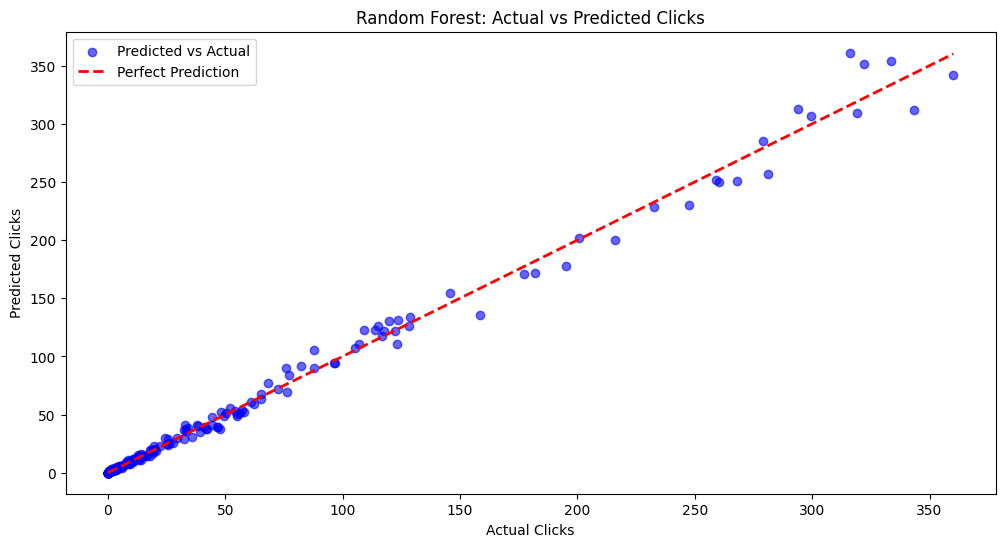

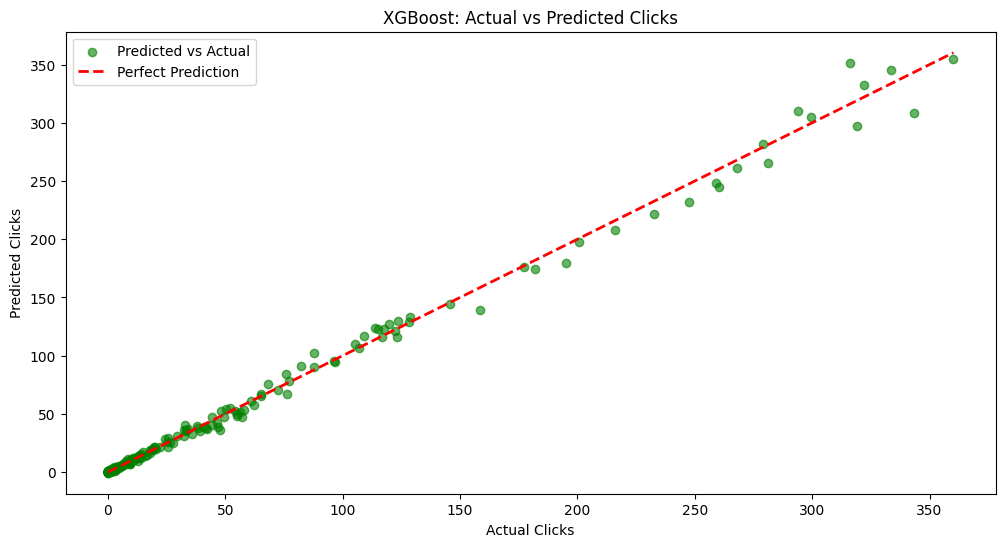

In [62]:
import matplotlib.pyplot as plt

# Predict on the test set
y_pred_rf = best_rf_model_spent.predict(X_test)
y_pred_xgb = best_xgb_model_spent.predict(X_test)

# Evaluate the models
def evaluate_model(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mse, rmse, mae, r2

mse_rf, rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
mse_xgb, rmse_xgb, mae_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

print(f'Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')
print(f'XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')

# Plot Actual vs Predicted for Random Forest
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Random Forest: Actual vs Predicted Clicks')
plt.legend()
plt.show()

# Plot Actual vs Predicted for XGBoost
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='g', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('XGBoost: Actual vs Predicted Clicks')
plt.legend()
plt.show()

# Total Conversion

In [63]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import SGDRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define feature columns and target variable
# feature_cols = ['ad_id', 'campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest_id', 'spent', "clicks"]
# target_col = 'total_conversion'

# # Separate features and target
# X = df[feature_cols]
# y = df[target_col]

# # Identify categorical and numerical columns
# categorical_cols = ['age', 'gender', 'interest_id']
# numerical_cols = ['ad_id', 'campaign_id', 'fb_campaign_id', 'spent', 'clicks']

# # Preprocessing for numerical data: impute missing values and scale
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data: impute missing values and one-hot encode
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models to train
# models = {
#     'Random Forest': RandomForestRegressor(random_state=42),
#     'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
#     'Neural Network': MLPRegressor(random_state=42),
#     'SGD Regressor': SGDRegressor(random_state=42),
#     'KNN Regressor': KNeighborsRegressor(),
#     'Support Vector Regressor': SVR()
# }

# # Function to evaluate models
# def evaluate_model(model, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     return mse

# # Evaluate each model
# results = {}
# for model_name, model in models.items():
#     mse = evaluate_model(model, X_train, X_test, y_train, y_test)
#     results[model_name] = mse
#     print(f'{model_name} MSE: {mse:.4f}')

# # Print the results
# print("\nModel Performance:")
# for model_name, mse in results.items():
#     print(f'{model_name}: MSE = {mse:.4f}')


# # Define parameter grids for Grid Search
# param_grid_rf = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [None, 10, 20],
#     'model__min_samples_split': [2, 5, 10]
# }

# param_grid_xgb = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [3, 5, 7],
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__subsample': [0.7, 0.8, 0.9]
# }

# # Function to perform Grid Search and evaluate the model
# def grid_search_evaluate(model, param_grid, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return grid_search.best_params_, mse, rmse, mae, r2

# # Perform Grid Search and evaluate Random Forest
# best_params_rf, mse_rf, rmse_rf, mae_rf, r2_rf = grid_search_evaluate(RandomForestRegressor(random_state=42), param_grid_rf, X_train, X_test, y_train, y_test)
# print(f'Random Forest Best Params: {best_params_rf}')
# print(f'Random Forest MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')

# # Perform Grid Search and evaluate XGBoost
# best_params_xgb, mse_xgb, rmse_xgb, mae_xgb, r2_xgb = grid_search_evaluate(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, X_test, y_train, y_test)
# print(f'XGBoost Best Params: {best_params_xgb}')
# print(f'XGBoost MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')



# # Function to perform Grid Search and return the best model
# def grid_search_best_model(model, param_grid, X_train, y_train):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     return grid_search.best_estimator_

# best_rf_model = grid_search_best_model(RandomForestRegressor(random_state=42), param_grid_rf, X_train, y_train)
# best_xgb_model = grid_search_best_model(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, y_train)

# # Predict on the test set
# y_pred_rf = best_rf_model.predict(X_test)
# y_pred_xgb = best_xgb_model.predict(X_test)


# import matplotlib.pyplot as plt

# # Predict on the test set
# y_pred_rf = best_rf_model.predict(X_test)
# y_pred_xgb = best_xgb_model.predict(X_test)

# # Evaluate the models
# def evaluate_model(y_test, y_pred):
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return mse, rmse, mae, r2

# mse_rf, rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
# mse_xgb, rmse_xgb, mae_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

# print(f'Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')
# print(f'XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')

# # Plot Actual vs Predicted for Random Forest
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Total Conversions')
# plt.ylabel('Predicted Total Conversions')
# plt.title('Random Forest: Actual vs Predicted Total Conversions')
# plt.legend()
# plt.show()

# # Plot Actual vs Predicted for XGBoost
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='g', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Total Conversions')
# plt.ylabel('Predicted Total Conversions')
# plt.title('XGBoost: Actual vs Predicted Total Conversions')
# plt.legend()
# plt.show()

# Approved conversion

In [64]:
# import pandas as pd
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.ensemble import RandomForestRegressor
# from xgboost import XGBRegressor
# from sklearn.neural_network import MLPRegressor
# from sklearn.linear_model import SGDRegressor
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.svm import SVR
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# # Define feature columns and target variable
# feature_cols = ['ad_id', 'campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest_id', 'spent', "clicks"]
# target_col = 'approved_conversion'

# # Separate features and target
# X = df[feature_cols]
# y = df[target_col]

# # Identify categorical and numerical columns
# categorical_cols = ['age', 'gender', 'interest_id']
# numerical_cols = ['ad_id', 'campaign_id', 'fb_campaign_id', 'spent', "clicks"]

# # Preprocessing for numerical data: impute missing values and scale
# numerical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='mean')),
#     ('scaler', StandardScaler())
# ])

# # Preprocessing for categorical data: impute missing values and one-hot encode
# categorical_transformer = Pipeline(steps=[
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('onehot', OneHotEncoder(handle_unknown='ignore'))
# ])

# # Combine preprocessing steps
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numerical_transformer, numerical_cols),
#         ('cat', categorical_transformer, categorical_cols)
#     ])

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define models to train
# models = {
#     'Random Forest': RandomForestRegressor(random_state=42),
#     'XGBoost': XGBRegressor(objective='reg:squarederror', random_state=42),
#     'Neural Network': MLPRegressor(random_state=42),
#     'SGD Regressor': SGDRegressor(random_state=42),
#     'KNN Regressor': KNeighborsRegressor(),
#     'Support Vector Regressor': SVR()
# }

# # Function to evaluate models
# def evaluate_model(model, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     pipeline.fit(X_train, y_train)
#     y_pred = pipeline.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     return mse

# # Evaluate each model
# results = {}
# for model_name, model in models.items():
#     mse = evaluate_model(model, X_train, X_test, y_train, y_test)
#     results[model_name] = mse
#     print(f'{model_name} MSE: {mse:.4f}')

# # Print the results
# print("\nModel Performance:")
# for model_name, mse in results.items():
#     print(f'{model_name}: MSE = {mse:.4f}')


# # Define parameter grids for Grid Search
# param_grid_rf = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [None, 10, 20],
#     'model__min_samples_split': [2, 5, 10]
# }

# param_grid_xgb = {
#     'model__n_estimators': [100, 200, 300],
#     'model__max_depth': [3, 5, 7],
#     'model__learning_rate': [0.01, 0.1, 0.2],
#     'model__subsample': [0.7, 0.8, 0.9]
# }

# # Function to perform Grid Search and evaluate the model
# def grid_search_evaluate(model, param_grid, X_train, X_test, y_train, y_test):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     best_model = grid_search.best_estimator_
#     y_pred = best_model.predict(X_test)
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return grid_search.best_params_, mse, rmse, mae, r2

# # Perform Grid Search and evaluate Random Forest
# best_params_rf, mse_rf, rmse_rf, mae_rf, r2_rf = grid_search_evaluate(RandomForestRegressor(random_state=42), param_grid_rf, X_train, X_test, y_train, y_test)
# print(f'Random Forest Best Params: {best_params_rf}')
# print(f'Random Forest MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')

# # Perform Grid Search and evaluate XGBoost
# best_params_xgb, mse_xgb, rmse_xgb, mae_xgb, r2_xgb = grid_search_evaluate(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, X_test, y_train, y_test)
# print(f'XGBoost Best Params: {best_params_xgb}')
# print(f'XGBoost MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')



# # Function to perform Grid Search and return the best model
# def grid_search_best_model(model, param_grid, X_train, y_train):
#     pipeline = Pipeline(steps=[('preprocessor', preprocessor),
#                                ('model', model)])
#     grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
#     grid_search.fit(X_train, y_train)
#     return grid_search.best_estimator_

# best_rf_model = grid_search_best_model(RandomForestRegressor(random_state=42), param_grid_rf, X_train, y_train)
# best_xgb_model = grid_search_best_model(XGBRegressor(objective='reg:squarederror', random_state=42), param_grid_xgb, X_train, y_train)

# # Predict on the test set
# y_pred_rf = best_rf_model.predict(X_test)
# y_pred_xgb = best_xgb_model.predict(X_test)


# import matplotlib.pyplot as plt

# # Predict on the test set
# y_pred_rf = best_rf_model.predict(X_test)
# y_pred_xgb = best_xgb_model.predict(X_test)

# # Evaluate the models
# def evaluate_model(y_test, y_pred):
#     mse = mean_squared_error(y_test, y_pred)
#     rmse = mean_squared_error(y_test, y_pred, squared=False)
#     mae = mean_absolute_error(y_test, y_pred)
#     r2 = r2_score(y_test, y_pred)
#     return mse, rmse, mae, r2

# mse_rf, rmse_rf, mae_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
# mse_xgb, rmse_xgb, mae_xgb, r2_xgb = evaluate_model(y_test, y_pred_xgb)

# print(f'Random Forest - MSE: {mse_rf:.4f}, RMSE: {rmse_rf:.4f}, MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}')
# print(f'XGBoost - MSE: {mse_xgb:.4f}, RMSE: {rmse_xgb:.4f}, MAE: {mae_xgb:.4f}, R²: {r2_xgb:.4f}')

# # Plot Actual vs Predicted for Random Forest
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred_rf, alpha=0.6, color='b', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Approved Conversions')
# plt.ylabel('Predicted Approved Conversions')
# plt.title('Random Forest: Actual vs Predicted Approved Conversions')
# plt.legend()
# plt.show()

# # Plot Actual vs Predicted for XGBoost
# plt.figure(figsize=(12, 6))
# plt.scatter(y_test, y_pred_xgb, alpha=0.6, color='g', label='Predicted vs Actual')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
# plt.xlabel('Actual Approved Conversions')
# plt.ylabel('Predicted Approved Conversions')
# plt.title('XGBoost: Actual vs Predicted Approved Conversions')
# plt.legend()
# plt.show()

# Create forecast dataset

In [65]:
y_test

158       0.00
1081     25.75
291       2.62
538      26.57
367       0.00
         ...  
66        0.00
328       0.00
67        0.00
231       2.81
966     106.93
Name: spent, Length: 229, dtype: float64

In [ ]:


# Define feature columns and target variable
feature_cols = ['campaign_id', 'age', 'gender', 'interest_id', 'clicks']
target_col = 'spent'




In [67]:
d = pd.read_csv("conversion_data.csv")
d.describe()


,ad_id,campaign_id,fb_campaign_id,interest_id,impressions,clicks,spent,total_conversion,approved_conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.950000,60.000000,21.000000


In [96]:
clicks = [0, 5, 10, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000]

unique_campaigns = d['campaign_id'].unique()

unique_age = d['age'].unique()

unique_gender = d["gender"].unique()

unique_interest = d["interest_id"].unique()

# creeate a dataframe that consists of all possible combinations of the unique values of the columns
import itertools
import pandas as pd

product_data = itertools.product(unique_campaigns, unique_age, unique_gender, unique_interest, clicks)

product_df = pd.DataFrame(product_data, columns=['campaign_id', 'age', 'gender', 'interest_id', 'clicks'])

pred_spent = best_xgb_model_spent.predict(product_df)


In [97]:
# if a campaign has a spent value of 0, then the predicted spent value is 0
pred_spent[pred_spent < 0] = 0

# round the predicted spent value to 2 decimal places
#pred_spent = pred_spent.round(2)

In [100]:
import numpy as np

product_df['spent'] = np.round(pred_spent, 2).astype(str)
product_df['spent'] = [f"{x:.2f}" for x in pred_spent]

product_df.to_csv("./data/predicted_spent.csv", index=False)